-----------------------------------------------------------------------------
    i     |     xi     |    f(xi)    |   f'(xi)   |   xi+1    |      E_a (%)   
-----------------------------------------------------------------------------
    0     |  -10.0000  | -2015098.0000 | 1206010.0000 |  -8.3291   |      N/A    
    1     |  -8.3291   | -675067.0914 | 484512.1383 |  -6.9358   |    20.0883  
    2     |  -6.9358   | -226187.0694 | 194619.1908 |  -5.7736   |    20.1295  
    3     |  -5.7736   | -75805.9753 | 78152.9135 |  -4.8037   |    20.1923  
    4     |  -4.8037   | -25417.8568 | 31368.1144 |  -3.9933   |    20.2915  
    5     |  -3.9933   | -8529.9546 | 12578.2147 |  -3.3152   |    20.4559  
    6     |  -3.3152   | -2867.4488 | 5033.9639  |  -2.7456   |    20.7469  
    7     |  -2.7456   | -967.3884  | 2006.3505  |  -2.2634   |    21.3025  
    8     |  -2.2634   | -328.9128  |  792.4199  |  -1.8483   |    22.4566  
    9     |  -1.8483   | -113.7374  |  306.7591  |  -1.477

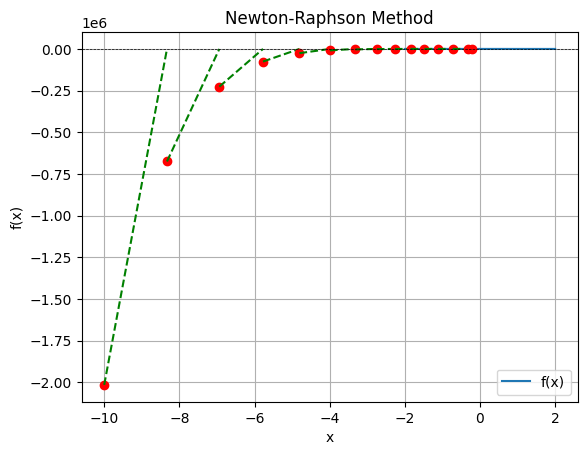

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return (-2 * x ** 6) - (1.5 * x ** 4) + (10 * x) + 2

def f_prime(x):
    return -12 * x ** 5 - 6 * x ** 3 + 10

xi = float(input("Enter xi (Initial Value): "))

# Initializes the variables of the method.
xi = xi
iterations = []
tol=2.0
max_iter=100

# Calculations.
for i in range(max_iter):
    fxi = f(xi)
    fpxi = f_prime(xi)

    if fpxi == 0:
        print("Derivative is zero. No solution found.")
        break

    xi_1 = xi - (fxi / fpxi)

    if i > 0:
        e_a = abs((xi_1 - xi) / xi_1) * 100
    else:
        e_a = None

    iterations.append((i, xi, fxi, fpxi, xi_1, e_a))

    if e_a is not None and e_a < tol:
        break

    xi = xi_1

# Prints the results.
print("-" * 77)
print("    i     |     xi     |    f(xi)    |   f'(xi)   |   xi+1    |      E_a (%)   ")
print("-" * 77)

for i, xi, fxi, fpxi, xi_plus_1, e_a in iterations:
    e_a_str = f"{e_a:^10.4f}" if e_a is not None else "   N/A    "
    print(f"{i:^9} | {xi:^10.4f} | {fxi:^10.4f} | {fpxi:^10.4f} | {xi_plus_1:^10.4f} |   {e_a_str}")

print(f"Root Approximation: {xi_plus_1:.4f}")
print(f"Root Found Nearly: {e_a:.2f} %")

x_vals = np.linspace(-2, 2, 400)
y_vals = f(x_vals)

# Plots the method itself.
plt.plot(x_vals, y_vals, label="f(x)")

# Highlights the roots.
for i, xi, fxi, fpxi, xi_plus_1, e_a in iterations:
    plt.plot(xi, fxi, 'ro')  
    plt.plot([xi, xi_plus_1], [fxi, 0], 'g--')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

# Adds titles, labels, legends, and window title.
plt.gcf().canvas.manager.set_window_title("Newton Rhapson Method | Function Plot")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton-Raphson Method')
plt.legend()
plt.grid()
plt.show()